Load digits dataset from sklearn.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
digits.data.shape

(1797, 64)

Plot 100 images from the digit dataset.

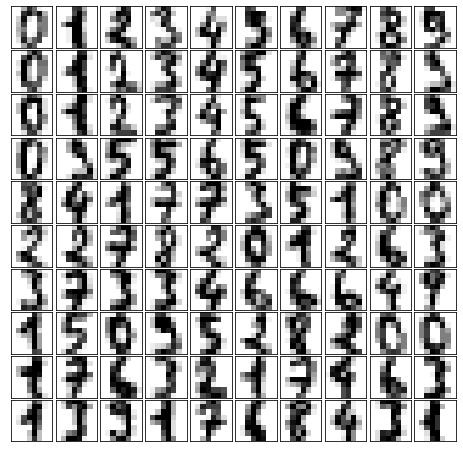

In [2]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

TODO - Reduce the data dimensionality with PCA, preserving 99% of the variance. Use whitening.



In [3]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

TODO - Try to fit the data to Gaussian mixture of 50, 60, 70, ..., and 200 components. Choose the optimal number of components based on AIC (Akaike Information Criterion).

Chosen number of components:  150


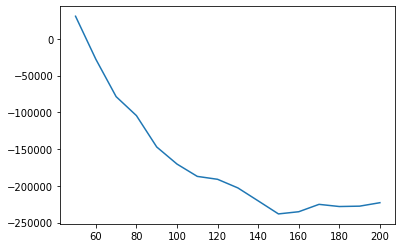

In [4]:
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)
idx = np.argmin(np.array(aics))
min_n_comp = n_components[np.argmin(np.array(aics))]
print("Chosen number of components: ", min_n_comp)

Verify if the best model converged.

In [5]:
gmm = models[idx]
#gmm = GMM(min_n_comp, covariance_type='full', random_state=0)
#gmm.fit(data)
print(gmm.converged_)

True


TODO - Sample new data from the fitted model and generate digits with inverse PCA (inverse_transform function)

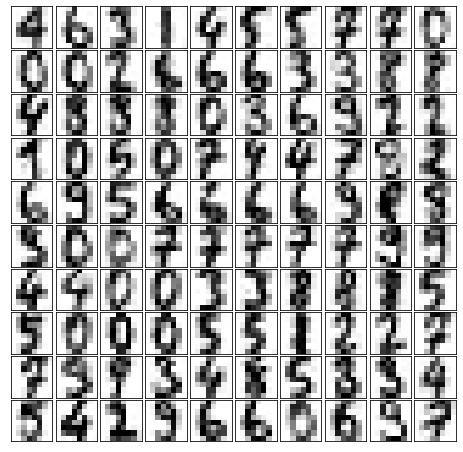

In [8]:
# Sample data
data_new = gmm.sample(100)
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)